In [1]:
from IPython.display import Image

In [2]:
Image(url='https://dstudio.imgix.net/AIRBNB-LOCATIONTYPOGRAPHY.gif')

In [3]:
# Importing libraries for analysis
import kaggle
import os
import zipfile

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [4]:
!kaggle datasets download dgomonov/new-york-city-airbnb-open-data


  0%|          | 0.00/2.44M [00:00<?, ?B/s]
 41%|████      | 1.00M/2.44M [00:00<00:00, 3.45MB/s]
 82%|████████▏ | 2.00M/2.44M [00:00<00:00, 3.85MB/s]
100%|██████████| 2.44M/2.44M [00:00<00:00, 3.90MB/s]
100%|██████████| 2.44M/2.44M [00:00<00:00, 3.83MB/s]


In [5]:
def find_name():
    for p in os.listdir():
        if p.endswith(".zip") or p.endswith(".csv"):
            return p

In [6]:
with zipfile.ZipFile(find_name(), "r") as zipref:
    zipref.extractall()

In [7]:
airbnb = pd.read_csv(find_name())

In [8]:
airbnb.shape
print("Dataset have {} columns and {} rows".format(airbnb.shape[0], airbnb.shape[1]))

Dataset have 48895 columns and 16 rows


In [9]:
# Looking type of every column in the dataset
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [10]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Cleaning Data

In [11]:
# Looking to find out first what columns have null values
airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
# Dropping columns that aren't interesting or could be causing privacy issues later on for use data exploration and predictions
airbnb.drop(["name", "host_name", "last_review"]
            , axis=1, inplace=True)

In [13]:
# Replacing all NaN values in the 'reviews per month' by zero
airbnb.fillna({'reviews_per_month': 0}
              , inplace=True)
# examing changes
airbnb.isna().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [14]:
# Dropping the duplicates if any
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

In [15]:
airbnb.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [16]:
airbnb[["price", "minimum_nights", "number_of_reviews", "reviews_per_month"
        , "calculated_host_listings_count", "availability_365"]]\
        .describe()\
        .round(decimals=2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00
mean,152.72,7.03,23.27,1.09,7.14,112.78
std,240.15,20.51,44.55,1.60,32.95,131.62
min,0.00,1.00,0.00,0.00,1.00,0.00
25%,69.00,1.00,1.00,0.04,1.00,0.00
50%,106.00,3.00,5.00,0.37,1.00,45.00
75%,175.00,5.00,24.00,1.58,2.00,227.00
max,10000.00,1250.00,629.00,58.50,327.00,365.00


## Exploring and Visualizing Data

In [17]:
# Importing libraries for visualizing data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

# Setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('whitegrid')

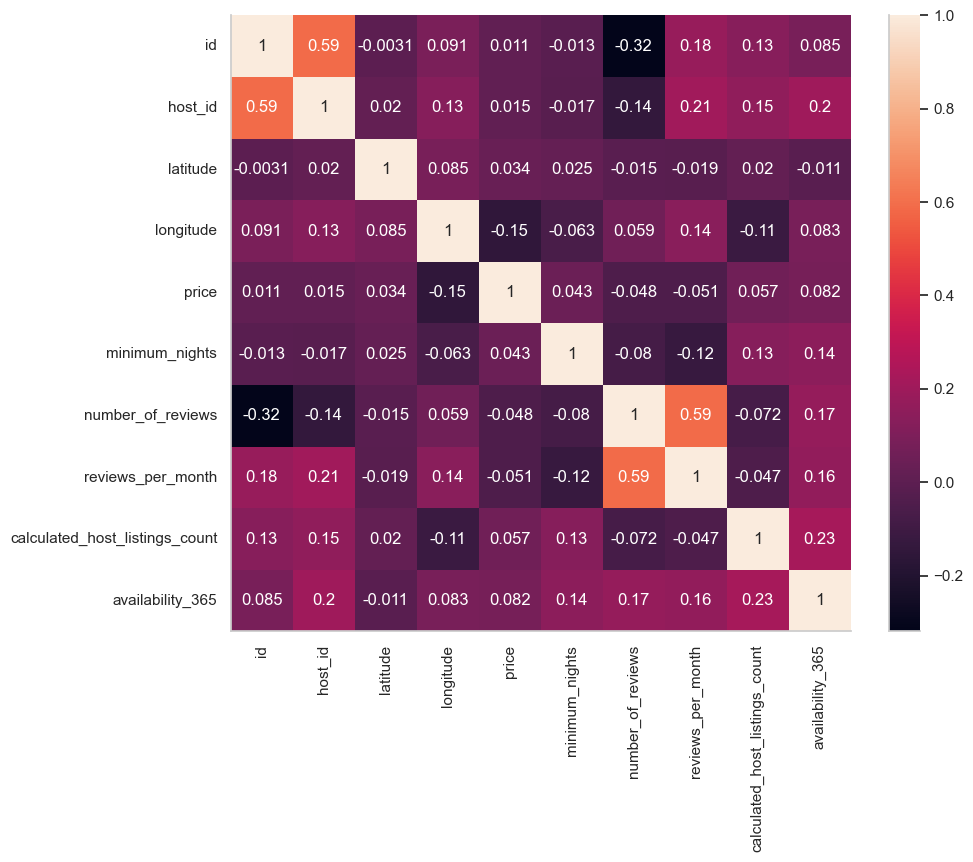

In [18]:
sns.heatmap(airbnb.corr()
            , annot=True)
sns.despine()

##### *Checking different categories to see of how to go about with the analysis*

In [19]:
# Looking price for each neighbourhood
airbnb.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [20]:
# Grouping the neighbourhoods and having a look at the price distributions
airbnb.groupby('neighbourhood_group').describe()\
      .xs('price', axis=1)

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


In [21]:
# Dataset have some extreme values, therefore I drop them for the sake of a better visualization
sub_airbnb = airbnb[airbnb.price < 500]

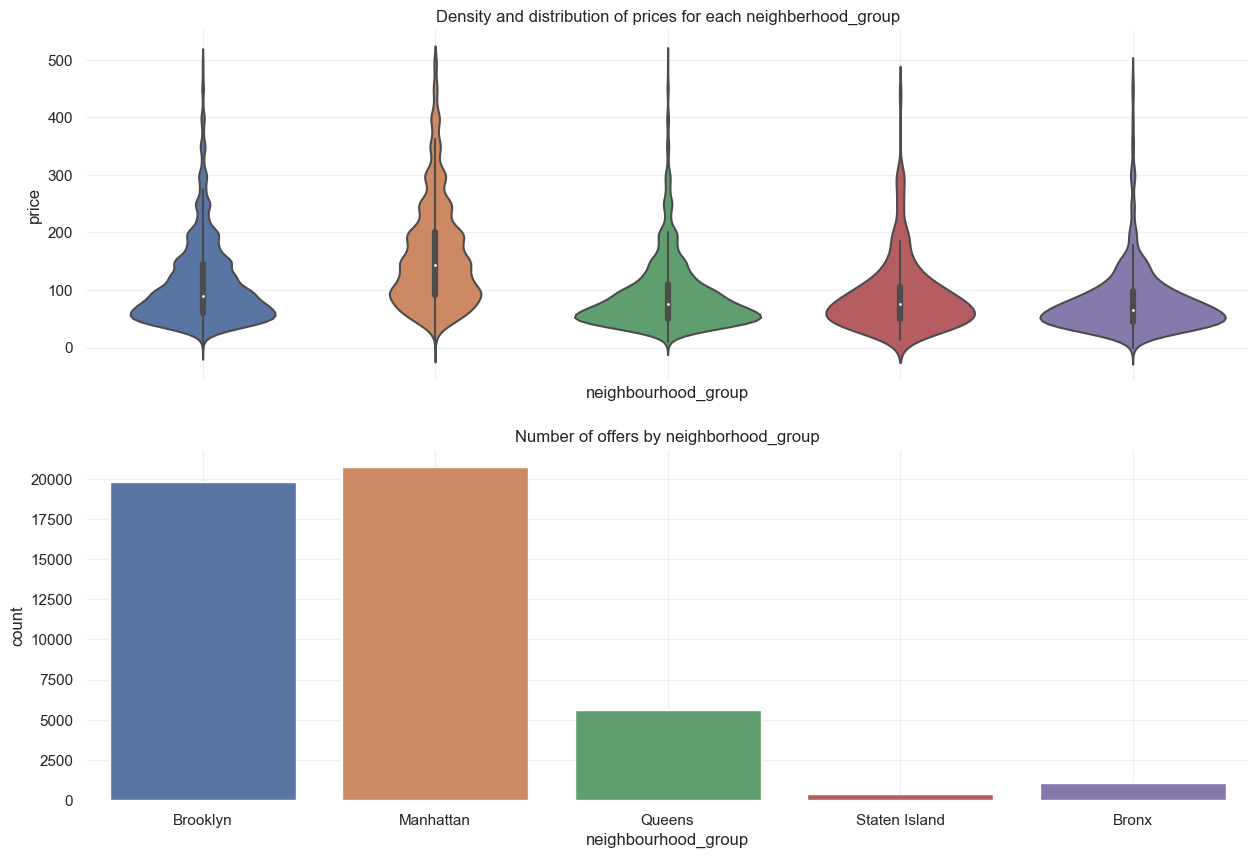

In [22]:
# Drowing a density and distribution of price for each neighberhood and number of offers by each neighberhood
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), sharex=True)

axs1 = sns.violinplot(data=sub_airbnb
                    , x='neighbourhood_group'
                    , y='price'
                    , ax=axes[0])
axs2 = sns.countplot(data=sub_airbnb
                    , x='neighbourhood_group'
                    , ax= axes[1])

axs1.set_title('Density and distribution of prices for each neighberhood_group')
axs2.set_title('Number of offers by neighborhood_group')

for ax in axes.flatten():
    ax.set_frame_on(False)  
    ax.grid(True, color='#e2e2e2', alpha=0.5)

##### *This violin plot is a depiction of the density and distribution of price in different neighbourhoods. The width of the violins is scaled by the number of observations in that bin. Both Brooklyn and Manhattan has many listings around the price 100 but Manhattan has more listings with a greater price.*

In [23]:
# Looking price for different types of rooms
airbnb.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [24]:
# Grouping the types of rooms and having a look at the price distributions
airbnb.groupby('room_type').describe()\
        .xs('price', axis=1)

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,25409.0,211.794246,284.041611,0.0,120.0,160.0,229.0,10000.0
Private room,22326.0,89.780973,160.205262,0.0,50.0,70.0,95.0,10000.0
Shared room,1160.0,70.127586,101.725252,0.0,33.0,45.0,75.0,1800.0


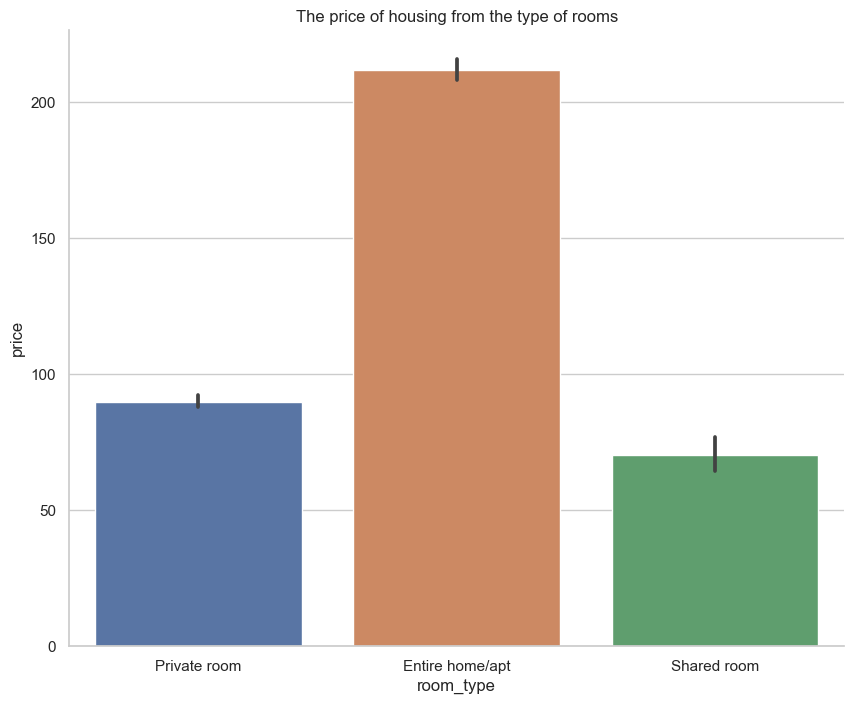

In [25]:
# Drawing the price of housing from the type of rooms
ax = sns.barplot(data=airbnb
                , x='room_type'
                , y='price')
ax.set(title='The price of housing from the type of rooms')
sns.despine()

##### *As expected, homes/apartments are more expensive than private room/shared room.*

In [26]:
# Lagarithmizing the price values to get rid of the extreme values
airbnb['price_log'] = np.log(airbnb.price)

# Grouping by neighbourhoods to display each neighbourhood separately
airbnb_group = airbnb.groupby('neighbourhood_group')

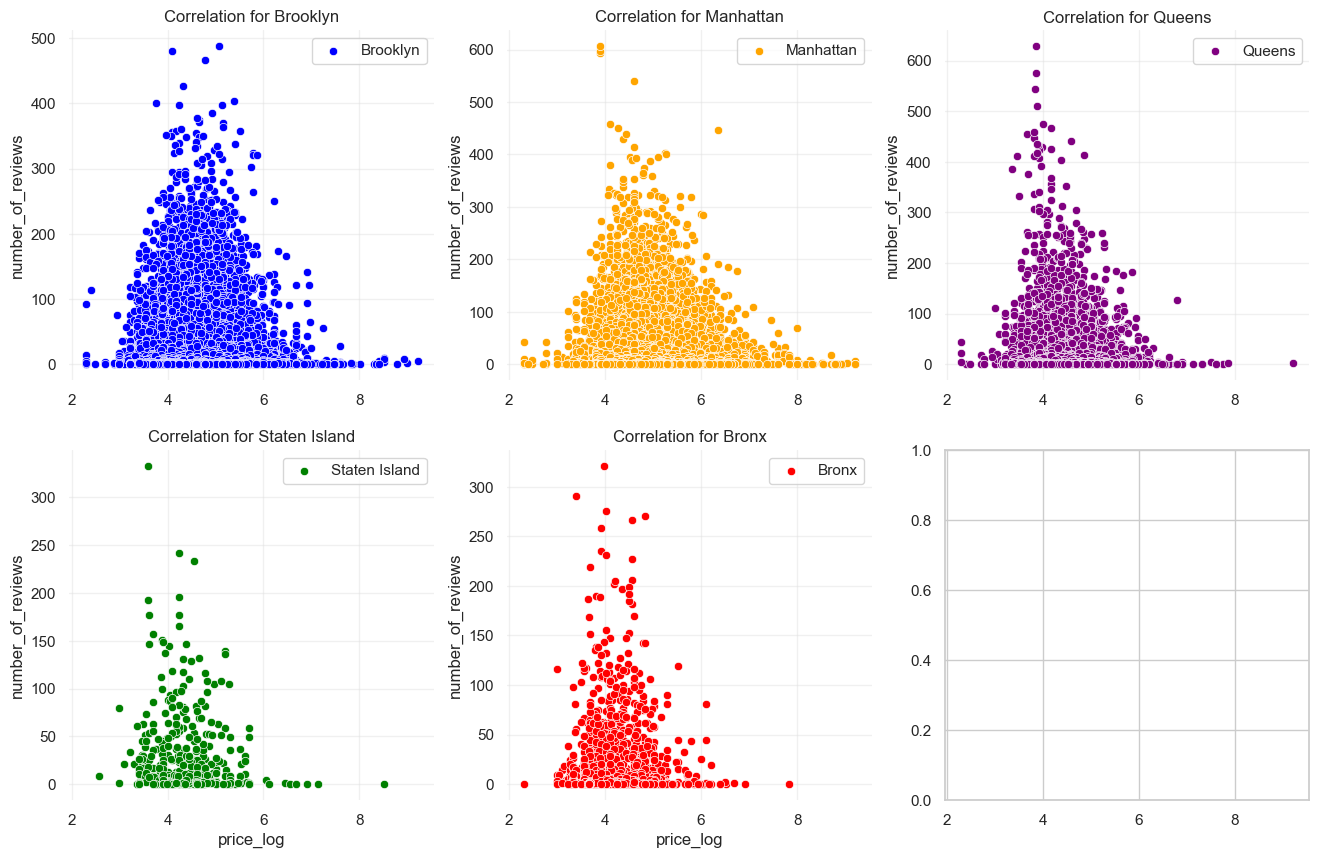

In [27]:
# Drawing a correlation between the number of reviews and price for any neighbourhood
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10), sharex=True)

neighbourhoods = [elem for elem in airbnb.neighbourhood_group.unique()]
colors = ['blue', 'orange', 'purple', 'green', 'red']

for neigh, color, ax in zip(neighbourhoods, colors, axes.flatten().T):
    sns.scatterplot(data=airbnb_group.get_group(neigh)
                    , x='price_log'
                    , y='number_of_reviews'
                    , ax=ax
                    , label=neigh
                    , color=color)
    ax.set(title='Correlation for {}'.format(neigh))
    ax.set_frame_on(False)
    ax.grid(True, color='#e2e2e2', alpha=0.5)
    ax.tick_params(labelbottom=True, which='both')

##### *It is not difficult to imagine that the number of reviews will be higher in areas where the price of housing offers is higher. In the picture above, everyone can see that Brooklyn, Manhattan, and Queens have twice as many reviews. As we know from the above analysis, these are some of the most expensive boroughs in New York City.*

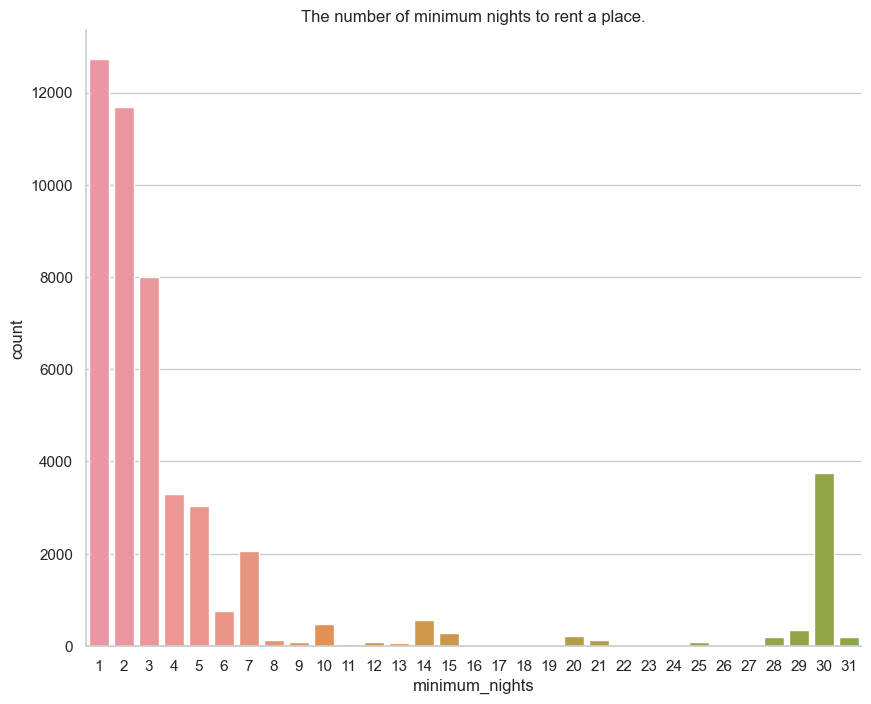

In [28]:
# Drawing the number of minimum nights to rent
ax = sns.countplot(data=airbnb
                   , x='minimum_nights')
ax.set_xlim(-0.5, 30.5)
ax.set_title('The number of minimum nights to rent a place.')
sns.despine()

##### *Most of the listings for minimum nights are less 5 days whereas some guests stay for about a month.*

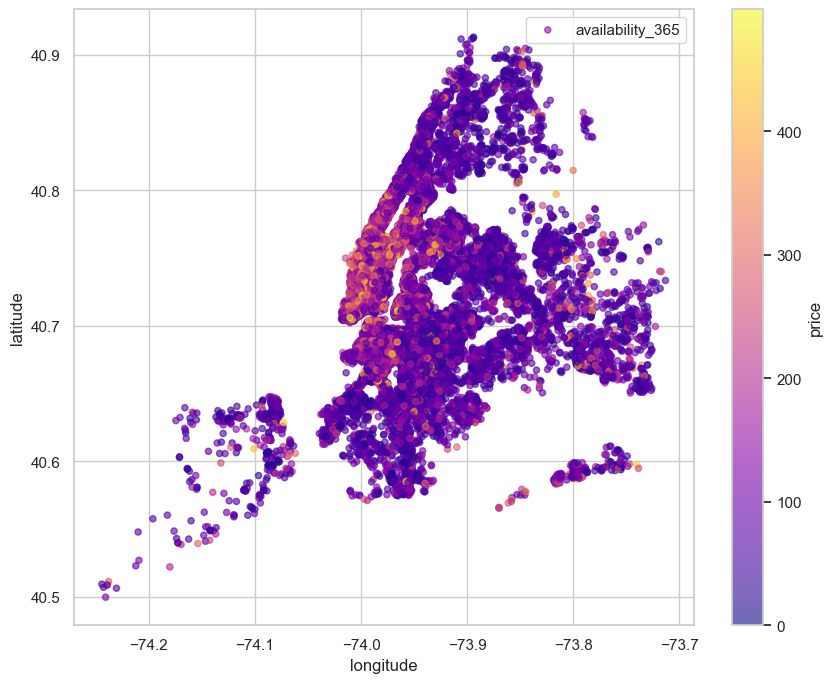

In [29]:
# Let's look see how scatterplot will come out
axs = sub_airbnb.plot(kind='scatter'
                      , x='longitude'
                      , y='latitude'
                      , label='availability_365'
                      , c='price'
                      , cmap='plasma'
                      , colorbar=True
                      , alpha=0.6)
axs.legend()
plt.show()

##### *Good, scatterplot worked just fine to output latitude and longitude points. However, it would be nice to have a map bellow for fully immersive heatmap!*

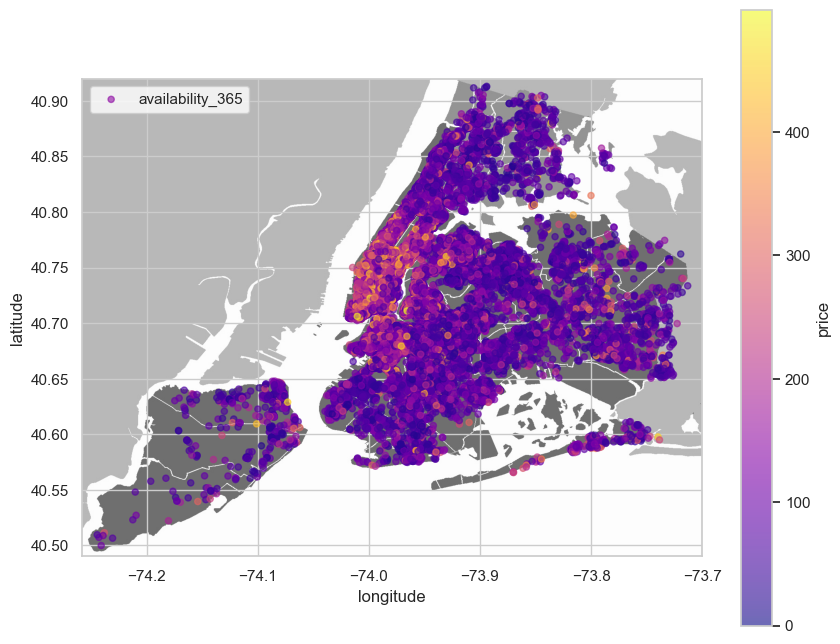

In [30]:
# Loading the *.jpg NYC image found on Google
img = mpimg.imread('New_York_City.jpg')

# Scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(img
           , extent=[-74.258, -73.7, 40.49, 40.92]
           , zorder=0)
ax = plt.gca()

# Using scatterplot again
sub_airbnb.plot(kind='scatter'
                , x='longitude'
                , y='latitude'
                , label='availability_365'
                , c='price'
                , ax=ax
                , cmap='plasma'
                , colorbar=True
                , alpha=0.6
                , zorder=5)

plt.legend()
plt.show()

##### *Fantastic! After scaling our image the best we can, we observe that we end up with a very immersive heatmap. Using latitude and longitude points I was able to visualize all NYC listings. Also, has been added a color-coded range for each point on the map based on the price of the listing. However, it's important to note that I had to drop some extremely high values because they are considered as outliers for my analysis.*

## Regression Analysis

In [31]:
# Importing libraries for prediction
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [32]:
# Using the columns on the basis of which the rent price prediction will be made
feature_columns = ['neighbourhood_group', 'room_type', 'price', 'minimum_nights'
                   , 'calculated_host_listings_count', 'availability_365']
airbnb_pred = airbnb[feature_columns]

airbnb_pred.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0


In [33]:
# Encoding the objects as a categorical variables
def encod_var(data):
    for column in data.columns[data.columns.isin(['neighbourhood_group', 'room_type'])]:
        data[column] = data[column].factorize()[0]
    return data

airbnb_pred = encod_var(airbnb_pred)

airbnb_pred.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149,1,6,365
1,1,1,225,1,2,355
2,1,0,150,3,1,365
3,0,1,89,1,1,194
4,1,1,80,10,1,0


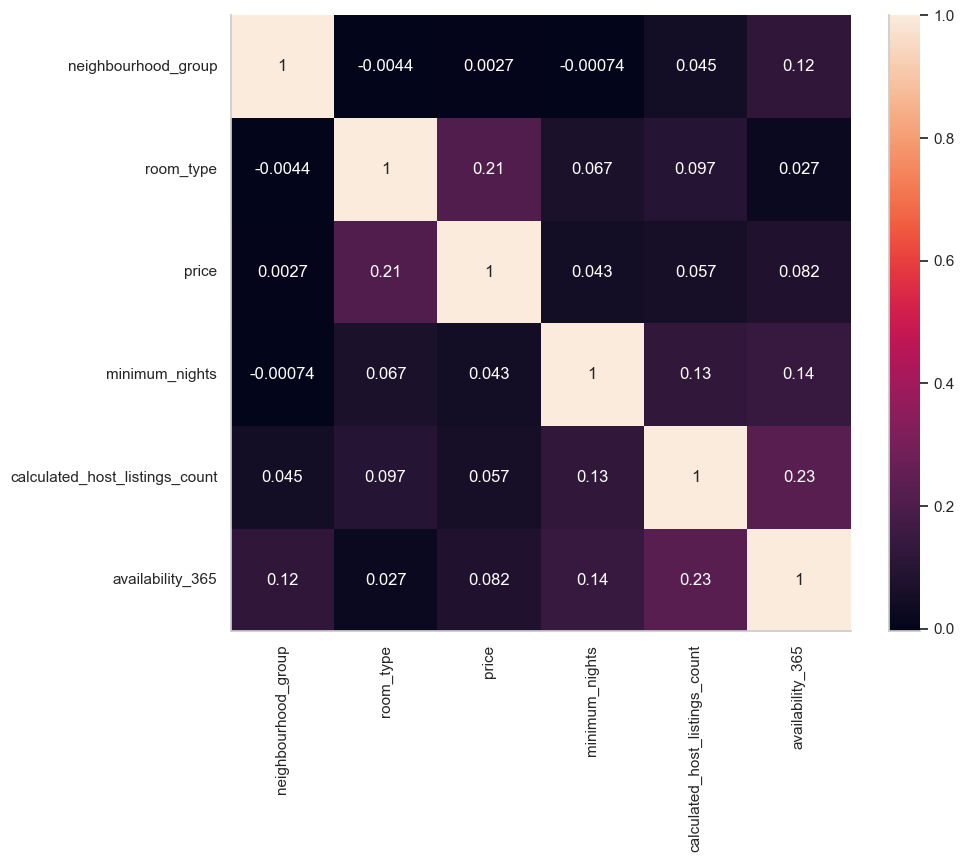

In [34]:
# Getting correlation between feature variables
sns.heatmap(airbnb_pred.corr()
            , annot=True)
sns.despine()
# airbnb.columns

In [35]:
# Defining the independent variables and dependent variables
y = airbnb_pred['price']
X = airbnb_pred.drop(['price']
                     , axis=1)

# Getting train test split
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size=.1
                                                    , random_state=420)

In [36]:
# Getting the R-squared score
def rsquared_score(test, pred):
    print('R-squared test score: {:.3f}'.format(r2_score(test, pred)))

In [37]:
# Preparing a Linear Regression Model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

rsquared_score(y_test, y_pred)

R-squared test score: 0.041


In [38]:
# Preparing a Lasso Regression Model
lasso = Lasso(alpha=10, max_iter = 10000)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

rsquared_score(y_test, y_pred)

R-squared test score: 0.036


In [39]:
# Prepairng a Decision Tree Regression
DTree = DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train, y_train)

y_pred = DTree.predict(X_test)

rsquared_score(y_test, y_pred)

R-squared test score: 0.103


In [40]:
# from sklearn.ensemble import RandomForestClassifier
# regressor = RandomForestClassifier()
# regressor.fit(X_train, y_train)
# print('R-squared score (test): {:.3f}'.format(regressor.score(X_test, y_test)))

##### *My models are predicting that how price is varying in New York on different features. Several methods of regression analysis were used: linear regression, lasso regression, decision tree regression. The accuracy of the models is as follows:*

- *Linear Regression = 4.1 %;*
- *Lasso Regression = 3.6 %;*
- *Decision Tree Regression = 10.3 %.*

*According to the results of the analysis I can judge about the low accuracy of the models. The accuracy of the models are low because the data is not equally spread along the linear regression line.*

## Conclusion

*This Airbnb dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed me to do deep data exploration on each significant column presented. I analyzed boroughs and neighborhood listing densities and what areas were more popular than another. Next, I found approximate rental prices from the type of rooms. It's no secret that apartments are the more expensive type of housing. I then looked at the correlation between the number of reviews and price for any neighbourhood. The densely populated and expensive boroughs of New York City: Brooklyn, Manhattan, and Queens have the most reviews. I also learned that most often people rent for less than 5 nights, but there are some long-timers who rent for a month or more. Further, I put good use of latitude and longitude columns and used to create a geographical heatmap color-coded by the price of listings. Overall, I discovered a very good number of interesting relationships between features and explained each step of the process.*

*In the last chapter, I created models for predicting that how rental price is varying in New York City based on different features. According to the results of the analysis I conclused the low accuracy of the models. The accuracy of the models are low because the data is not equally spread along the linear regression line.*